In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
xs = np.array([1,2,3,4,5])
ys = np.array([5,4,6,5,6])

In [3]:
def best_fit_slope_intercept(xs,ys):
    theta = ((np.mean(xs)*np.mean(ys)) - (np.mean(xs*ys)))/((np.mean(xs)**2) - (np.mean(xs**2)))
    b = np.mean(ys) - theta*np.mean(xs)
    return theta,b
theta, b = best_fit_slope_intercept(xs,ys)
T
print(theta,b)

0.29999999999999893 4.300000000000003


In [4]:
y_predicted = theta*xs + b
y_predicted 

array([4.6, 4.9, 5.2, 5.5, 5.8])

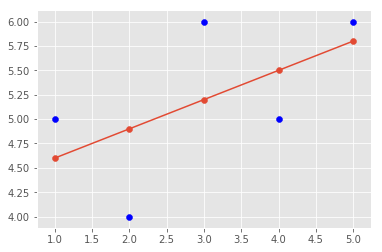

In [5]:
plt.scatter(xs,ys,color = 'b')
plt.plot(xs, y_predicted)
plt.scatter(xs, y_predicted)
plt.show()


In [6]:
def predict(x):
    return (theta*x + b)

In [7]:
predict(np.array([3,8,6,4,2]))

array([5.2, 6.7, 6.1, 5.5, 4.9])

In [16]:
df = pd.read_csv('bike sharing hour.csv')
df.drop(['dteday','instant'],axis = 1,inplace = True)
full_data = df.astype(float).values.tolist()
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
header = list(df)
header

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [20]:
xs = np.array(full_data)[:,-3:-1]
ys = np.array(full_data)[:,-1]
xs

array([[ 3., 13.],
       [ 8., 32.],
       [ 5., 27.],
       ...,
       [ 7., 83.],
       [13., 48.],
       [12., 37.]])

In [22]:
xs.shape

(17379, 2)

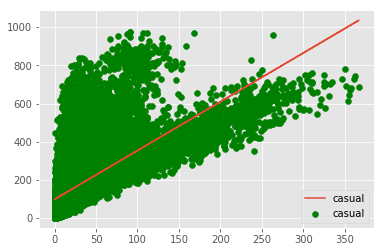

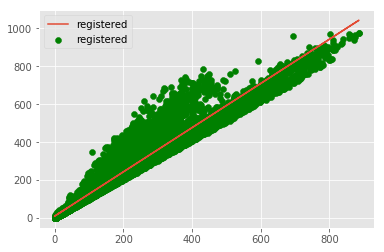

In [24]:
for i in range(0,len(xs[0])):
    m1,b1 = best_fit_slope_intercept(xs[:,i],ys)
    plt.scatter(xs[:,i],ys,label = header[-3+i],color = 'g')
    plt.plot(xs[:,i],m1*xs[:,i]+b1,label = header[-3+i])
    plt.legend(loc = 'best')
    plt.savefig('plot_'+header[-3+i]+'.png')
    plt.show()